# Montecarlo simulation
#### <span style="color:red">Disclaimer: This model assumes a uniform distribution of all input variables</span> 


"The P90 value of the reserves simulation is:" 430427792.0 "STB"


<IPython.core.display.Javascript object>


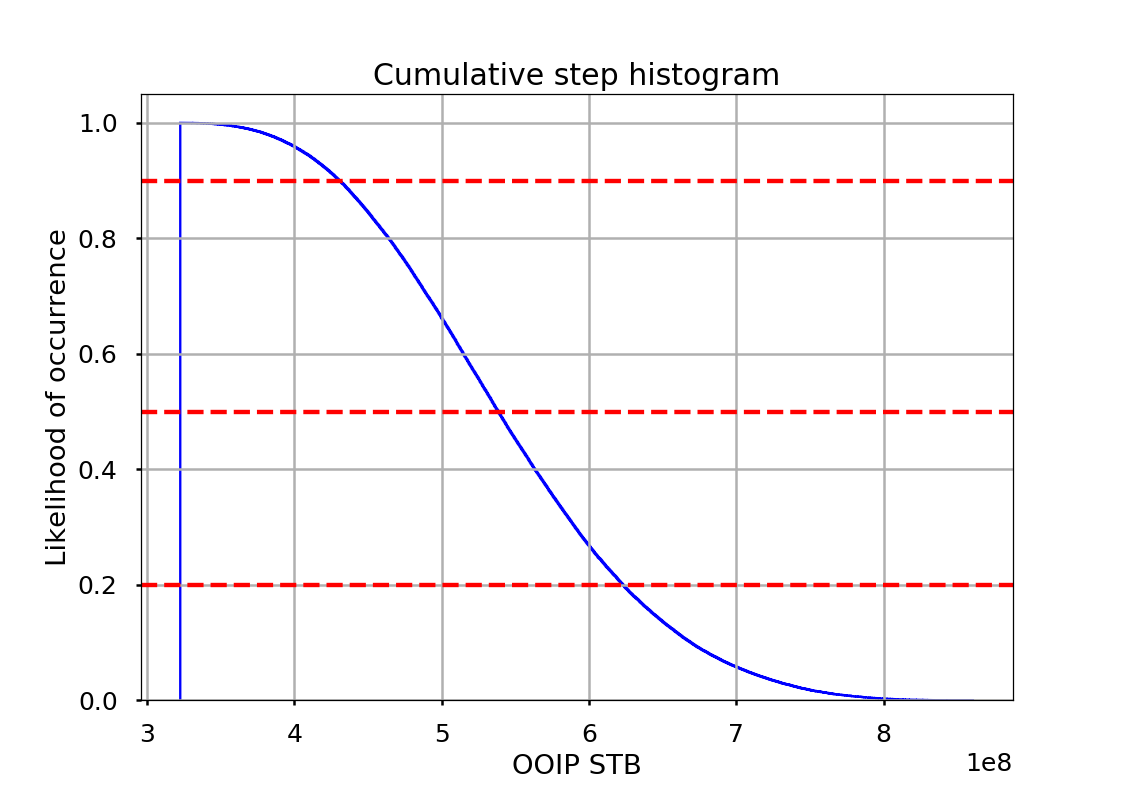

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook
plt.style.use('seaborn-poster')

# function to calculate OOIP
def ooip():
    a = 26880 # a is in acres
    ntg = 0.6 # 0.6 is NTG ratio
    h = np.random.uniform(150, 200) # h is in ft
    phi = np.random.uniform(0.08, 0.11) # this is a percentage
    sw = np.random.uniform(0.51, 0.67) # this is a percentage
    Bo = np.random.uniform(1.55, 1.58) # Bo is bbl/STB

    ooip = (7758* a* ntg* h* phi* (1-sw))/ Bo
    return ooip

# how many times to run simulation
hist = []
it = 0
while it < 100000: # number of iterations
    hist.append(ooip())
    it += 1
print("\x1b[31m\"The P90 value of the reserves simulation is:\"\x1b[0m", round(np.percentile(hist, 10)), "\x1b[31m\"STB\"\x1b[0m" )

# plotting results
fig = plt.figure(figsize = (10,7))
ax = fig.subplots()

ax.hist(hist, bins = 1000, density = True, cumulative = -1, histtype = 'step', linewidth = 1.5, color = 'b') # bins = number of bins in histogram
ax.axhline(0.9, color = 'r', linestyle = '--')
ax.axhline(0.5, color = 'r', linestyle = '--')
ax.axhline(0.2, color = 'r', linestyle = '--')

ax.grid(True)
ax.set_title('Cumulative step histogram')
ax.set_xlabel('OOIP STB')
ax.set_ylabel('Likelihood of occurrence')
plt.show()

### OOIP per 160 acres

In [6]:
oil_per_acre = np.percentile(hist, 10) 
acres = 160 
print('This equates to :', round(oil_per_acre / acres / 1000000, 2), 'MMSTB per 160 acre')

This equates to : 2.69 MMSTB per 160 acre
